<a href="https://colab.research.google.com/github/shreykx/pytorch-playground/blob/main/pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

torch.__version__

'2.5.1+cu121'

In [3]:
df = pd.read_csv('updated_pollution_dataset.csv')

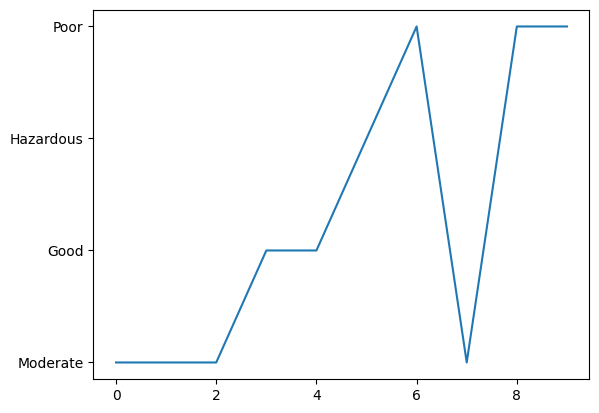

In [4]:
plt.plot(df["Air Quality"][:10])

We're going to use a **Multiple Regression Model**

In [5]:
X = df[["Temperature", "Humidity", "PM2.5", "PM10", "NO2", "SO2", "CO", "Proximity_to_Industrial_Areas", "Population_Density"]].values
y = df["Air Quality"].values



# we'll convert the string type y vals into numeric for
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [6]:
X[:10] # Viewing X till 10

array([[ 29.8 ,  59.1 ,   5.2 ,  17.9 ,  18.9 ,   9.2 ,   1.72,   6.3 ,
        319.  ],
       [ 28.3 ,  75.6 ,   2.3 ,  12.2 ,  30.8 ,   9.7 ,   1.64,   6.  ,
        611.  ],
       [ 23.1 ,  74.7 ,  26.7 ,  33.8 ,  24.4 ,  12.6 ,   1.63,   5.2 ,
        619.  ],
       [ 27.1 ,  39.1 ,   6.1 ,   6.3 ,  13.5 ,   5.3 ,   1.15,  11.1 ,
        551.  ],
       [ 26.5 ,  70.7 ,   6.9 ,  16.  ,  21.9 ,   5.6 ,   1.01,  12.7 ,
        303.  ],
       [ 39.4 ,  96.6 ,  14.6 ,  35.5 ,  42.9 ,  17.9 ,   1.82,   3.1 ,
        674.  ],
       [ 41.7 ,  82.5 ,   1.7 ,  15.8 ,  31.1 ,  12.7 ,   1.8 ,   4.6 ,
        735.  ],
       [ 31.  ,  59.6 ,   5.  ,  16.8 ,  24.2 ,  13.6 ,   1.38,   6.3 ,
        443.  ],
       [ 29.4 ,  93.8 ,  10.3 ,  22.7 ,  45.1 ,  11.8 ,   2.03,   5.4 ,
        486.  ],
       [ 33.2 ,  80.5 ,  11.1 ,  24.4 ,  32.  ,  15.3 ,   1.69,   4.9 ,
        535.  ]])

In [7]:
y[:10] # viewing y till 10

array([2, 2, 2, 0, 0, 1, 3, 2, 3, 3])

In [8]:
y

array([2, 2, 2, ..., 2, 0, 2])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train[:-10], len(X_train)

(array([[3.880e+01, 9.250e+01, 8.300e+00, ..., 2.190e+00, 3.900e+00,
         6.980e+02],
        [2.630e+01, 5.410e+01, 9.000e-01, ..., 9.500e-01, 1.010e+01,
         3.160e+02],
        [3.720e+01, 1.113e+02, 2.000e-01, ..., 2.120e+00, 7.700e+00,
         7.530e+02],
        ...,
        [4.420e+01, 9.530e+01, 1.700e+00, ..., 2.430e+00, 4.100e+00,
         5.810e+02],
        [5.650e+01, 1.135e+02, 7.460e+01, ..., 2.200e+00, 3.600e+00,
         6.900e+02],
        [3.230e+01, 6.950e+01, 4.000e-01, ..., 1.350e+00, 5.800e+00,
         6.430e+02]]),
 4000)

In [11]:
X_test[:-10], len(X_test)

(array([[ 31.3 ,  73.4 ,  72.8 , ...,   2.54,   2.6 , 755.  ],
        [ 24.  ,  68.8 ,   0.8 , ...,   1.16,  10.5 , 235.  ],
        [ 25.4 ,  78.6 ,   4.1 , ...,   1.4 ,  10.1 , 543.  ],
        ...,
        [ 33.1 ,  99.2 ,  17.6 , ...,   2.45,   6.8 , 623.  ],
        [ 31.9 ,  53.6 ,  13.3 , ...,   1.67,  11.3 , 366.  ],
        [ 33.8 ,  66.9 ,   5.8 , ...,   1.06,  14.4 , 298.  ]]),
 1000)

In [12]:
y_train[:-10], y_test[:-10], len(y_train), len(y_test)

(array([1, 0, 3, ..., 1, 1, 2]),
 array([1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0, 0, 2, 3, 0, 0,
        3, 2, 0, 3, 0, 0, 2, 2, 0, 3, 3, 2, 2, 2, 2, 2, 2, 0, 3, 2, 1, 0,
        0, 2, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 3, 0, 0, 0, 0, 2, 0, 1,
        3, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 2,
        2, 3, 2, 0, 0, 3, 3, 2, 2, 0, 3, 0, 1, 2, 3, 2, 1, 0, 0, 0, 2, 0,
        2, 2, 2, 0, 2, 3, 1, 0, 0, 0, 2, 3, 3, 2, 3, 0, 2, 2, 0, 0, 2, 0,
        3, 0, 2, 2, 0, 0, 2, 0, 0, 3, 0, 0, 2, 2, 1, 0, 2, 2, 3, 3, 3, 0,
        0, 3, 2, 2, 2, 2, 1, 0, 2, 1, 3, 3, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0,
        0, 2, 0, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1,
        3, 3, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 3, 0, 1,
        0, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 2, 0,
        2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 3, 0, 0, 1, 3, 0, 2, 0, 1,
        0, 2, 3, 3, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 3, 0, 1, 0, 0, 3, 2, 0,
     

In [13]:
len(X_train)==len(y_train) # must be true

True

In [14]:
len(X_test)==len(y_test) # must be true

True

In [20]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [21]:
X[:4]

array([[ 29.8 ,  59.1 ,   5.2 ,  17.9 ,  18.9 ,   9.2 ,   1.72,   6.3 ,
        319.  ],
       [ 28.3 ,  75.6 ,   2.3 ,  12.2 ,  30.8 ,   9.7 ,   1.64,   6.  ,
        611.  ],
       [ 23.1 ,  74.7 ,  26.7 ,  33.8 ,  24.4 ,  12.6 ,   1.63,   5.2 ,
        619.  ],
       [ 27.1 ,  39.1 ,   6.1 ,   6.3 ,  13.5 ,   5.3 ,   1.15,  11.1 ,
        551.  ]])

# **Building Model Class**



In [22]:
class Classifier(nn.Module):
  def __init__(self, input_size, output_size):
      super(Classifier, self).__init__()
      self.fc1 = nn.Linear(input_size, 64) # 64 neurons hidden layer
      self.fc2 = nn.Linear(64, output_size) # output layer
  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [23]:
input_size = X_train_tensor.shape[1]
output_size = len(np.unique(y))

model = Classifier(input_size, output_size)

criterion= nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1000

for epoch in range(epochs):
  model.train()


  outputs = model(X_train_tensor)
  loss = criterion(outputs, y_train_tensor)

  # backward pass and optimization

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1)%100 == 0:
      print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
model.eval()
with torch.no_grad():
  outputs = model(X_test_tensor)
  _, predicted = torch.max(outputs, 1) # predicted class
  accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

Epoch [100/1000], Loss: 1.2456
Epoch [200/1000], Loss: 0.9782
Epoch [300/1000], Loss: 0.8517
Epoch [400/1000], Loss: 0.7665
Epoch [500/1000], Loss: 0.7040
Epoch [600/1000], Loss: 0.6576
Epoch [700/1000], Loss: 0.6209
Epoch [800/1000], Loss: 0.5907
Epoch [900/1000], Loss: 0.5644
Epoch [1000/1000], Loss: 0.5400
Accuracy on the test set: 78.80%


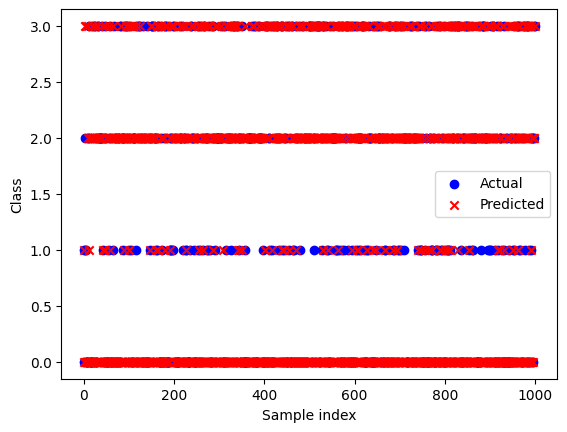

In [24]:
# visualizing
plt.scatter(range(len(y_test_tensor)), y_test_tensor.numpy(), label='Actual', color='blue')
plt.scatter(range(len(y_test_tensor)), predicted.numpy(), label='Predicted', color='red', marker='x')
plt.xlabel('Sample index')
plt.ylabel('Class')
plt.legend()
plt.show()